# Healthcare Cost Prediction Dashboard
## Predictive Analytics for Health Insurance

---

**Project Overview:**  
As a Data Scientist at a leading Health Insurance company, this project leverages machine learning to predict customer healthcare costs. The insights derived will help tailor services and guide customers in planning their healthcare expenses more effectively.

**Dataset:**  
- `insurance.csv` - Training dataset with 7 features including age, sex, BMI, children, smoker status, region, and charges
- `validation_dataset.csv` - Validation dataset for testing model predictions

**Objectives:**
1. Perform comprehensive exploratory data analysis
2. Engineer relevant features to improve model performance
3. Train and evaluate multiple machine learning models
4. Generate predictions for validation dataset
5. Create professional visualizations and insights

---

## 1. Setup & Imports

We'll import all necessary libraries and functions from our main analysis module.

In [1]:
# Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import functions from our healthcare_analysis module
from healthcare_analysis import (
    load_and_clean_data,
    load_validation_data,
    prepare_features,
    train_model,
    predict_validation,
    create_dashboard
)

# Configure plotting
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)

print("✓ All imports successful!")
print("✓ Ready to use functions from healthcare_analysis.py")

✓ All imports successful!
✓ Ready to use functions from healthcare_analysis.py


## 2. Quick Start - Full Analysis Pipeline

Run the complete analysis pipeline using the main module.

In [2]:
# Option 1: Run the entire pipeline from the module
from healthcare_analysis import main

# Execute full analysis
df, val_df, predictions, metrics = main()

print("\n" + "="*60)
print("✓ Full analysis pipeline completed!")
print("✓ Dashboard saved as 'healthcare_dashboard.png'")
print("✓ Predictions saved as 'validation_predictions.csv'")
print("="*60)

HEALTHCARE COST PREDICTION ANALYSIS

[1/5] Loading and cleaning data...
   Training records: 1119
   Validation records: 50

[2/5] Training prediction model...
   Model: Random Forest Regressor
   R² Score: 0.8299
   RMSE: $4,679.66
   MAE: $2,874.53

[3/5] Generating validation predictions...
   Predictions saved to validation_predictions.csv

[4/5] Creating dashboard...
Dashboard saved as healthcare_dashboard.png

[5/5] Summary Statistics
----------------------------------------
Training Data:
   Average Charges: $13,284.34
   Median Charges: $9,447.25
   Min Charges: $1,121.87
   Max Charges: $63,770.43

Validation Predictions:
   Average Predicted: $24,107.24
   Median Predicted: $12,159.92
   Min Predicted: $1,708.17
   Max Predicted: $115,225.15

ANALYSIS COMPLETE!

✓ Full analysis pipeline completed!
✓ Dashboard saved as 'healthcare_dashboard.png'
✓ Predictions saved as 'validation_predictions.csv'


## 3. Interactive Data Exploration

Now let's explore the data interactively using the loaded datasets.

In [3]:
# Display basic information
print("="*60)
print("DATASET OVERVIEW")
print("="*60)
print(f"\nTraining Data Shape: {df.shape}")
print(f"Validation Data Shape: {val_df.shape}")
print(f"\nTraining Data Info:")
display(df.head(10))

print("\n" + "="*60)
print("STATISTICAL SUMMARY")
print("="*60)
display(df.describe())

DATASET OVERVIEW

Training Data Shape: (1119, 7)
Validation Data Shape: (50, 6)

Training Data Info:


,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.90,0.0,yes,southwest,16884.92
1,18.0,male,33.77,1.0,no,southeast,1725.55
2,28.0,male,33.00,3.0,no,southeast,4449.46
3,33.0,male,22.70,0.0,no,northwest,21984.47
4,32.0,male,28.88,0.0,no,northwest,3866.86
6,46.0,female,33.44,1.0,no,southeast,8240.59
7,37.0,female,27.74,3.0,no,northwest,7281.51
8,37.0,male,29.83,2.0,no,northeast,6406.41
9,60.0,female,25.84,0.0,no,northwest,28923.14
10,25.0,male,26.22,0.0,no,northeast,2721.32



STATISTICAL SUMMARY


,age,bmi,children,charges
count,1119.00,1119.00,1119.00,1119.00
mean,39.23,30.60,1.05,13284.34
std,14.20,6.12,1.19,12154.97
min,18.00,15.96,0.00,1121.87
25%,26.00,26.25,0.00,4718.86
50%,39.00,30.23,1.00,9447.25
75%,51.50,34.69,2.00,16582.14
max,64.00,53.13,5.00,63770.43


### 3.1 Distribution Analysis

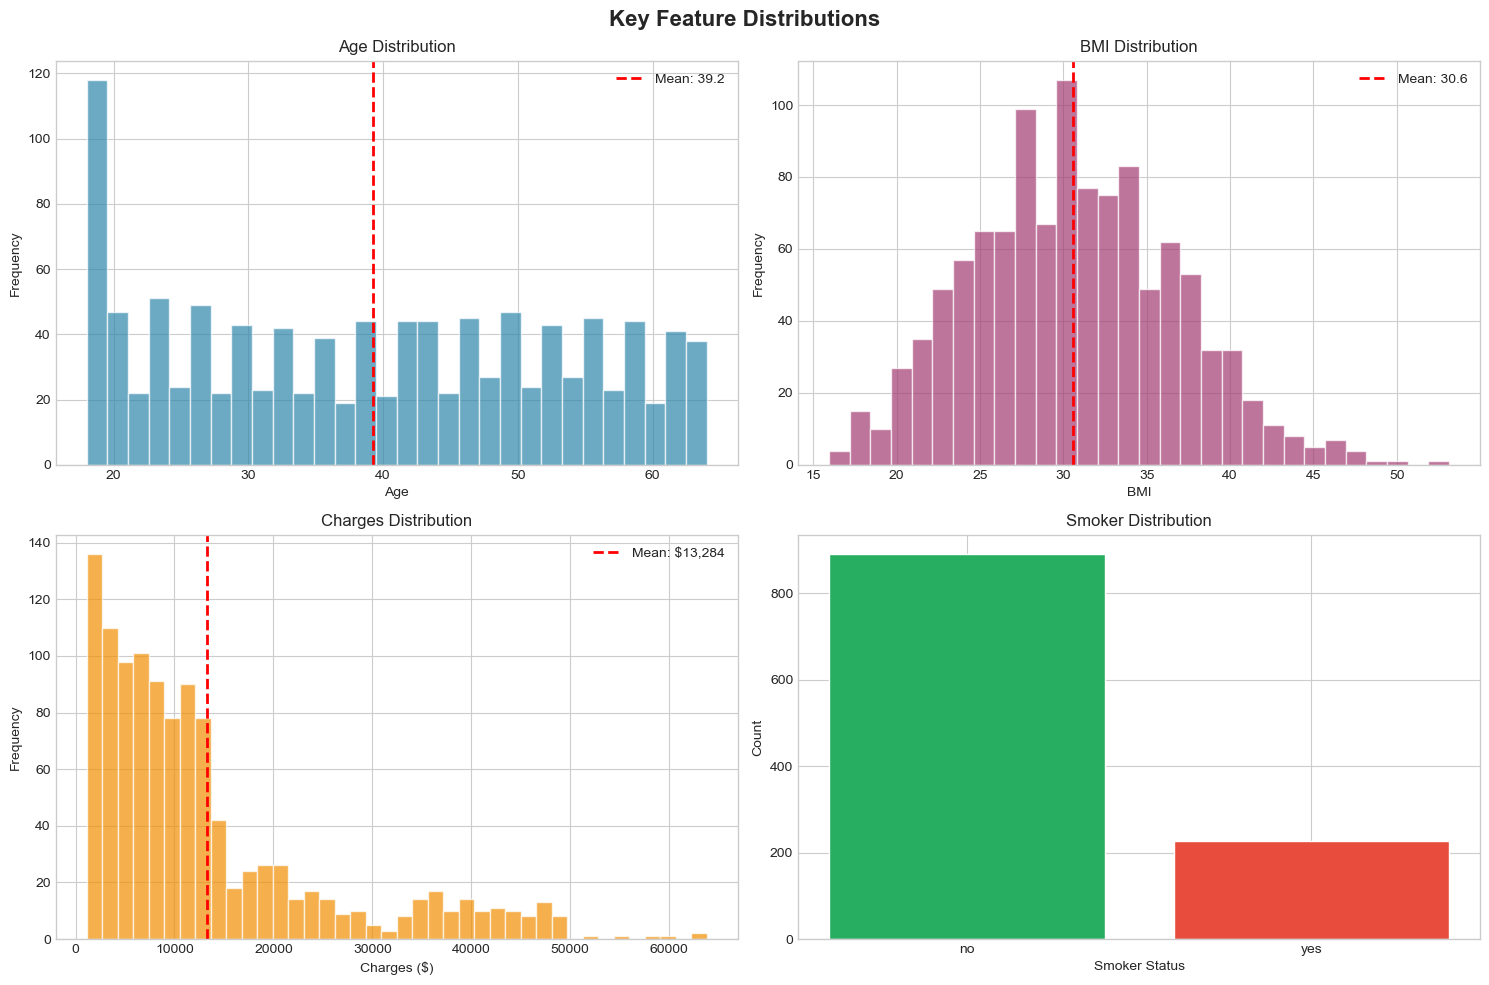

In [4]:
# Create custom distribution plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Key Feature Distributions', fontsize=16, fontweight='bold')

# Age distribution
axes[0, 0].hist(df['age'], bins=30, color='#2E86AB', edgecolor='white', alpha=0.7)
axes[0, 0].axvline(df['age'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["age"].mean():.1f}')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].legend()

# BMI distribution
axes[0, 1].hist(df['bmi'], bins=30, color='#A23B72', edgecolor='white', alpha=0.7)
axes[0, 1].axvline(df['bmi'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["bmi"].mean():.1f}')
axes[0, 1].set_xlabel('BMI')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('BMI Distribution')
axes[0, 1].legend()

# Charges distribution
axes[1, 0].hist(df['charges'], bins=40, color='#F18F01', edgecolor='white', alpha=0.7)
axes[1, 0].axvline(df['charges'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ${df["charges"].mean():,.0f}')
axes[1, 0].set_xlabel('Charges ($)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Charges Distribution')
axes[1, 0].legend()

# Smoker distribution
smoker_counts = df['smoker'].value_counts()
axes[1, 1].bar(smoker_counts.index, smoker_counts.values, color=['#27ae60', '#e74c3c'], edgecolor='white')
axes[1, 1].set_xlabel('Smoker Status')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Smoker Distribution')

plt.tight_layout()
plt.show()

### 3.2 Categorical Analysis

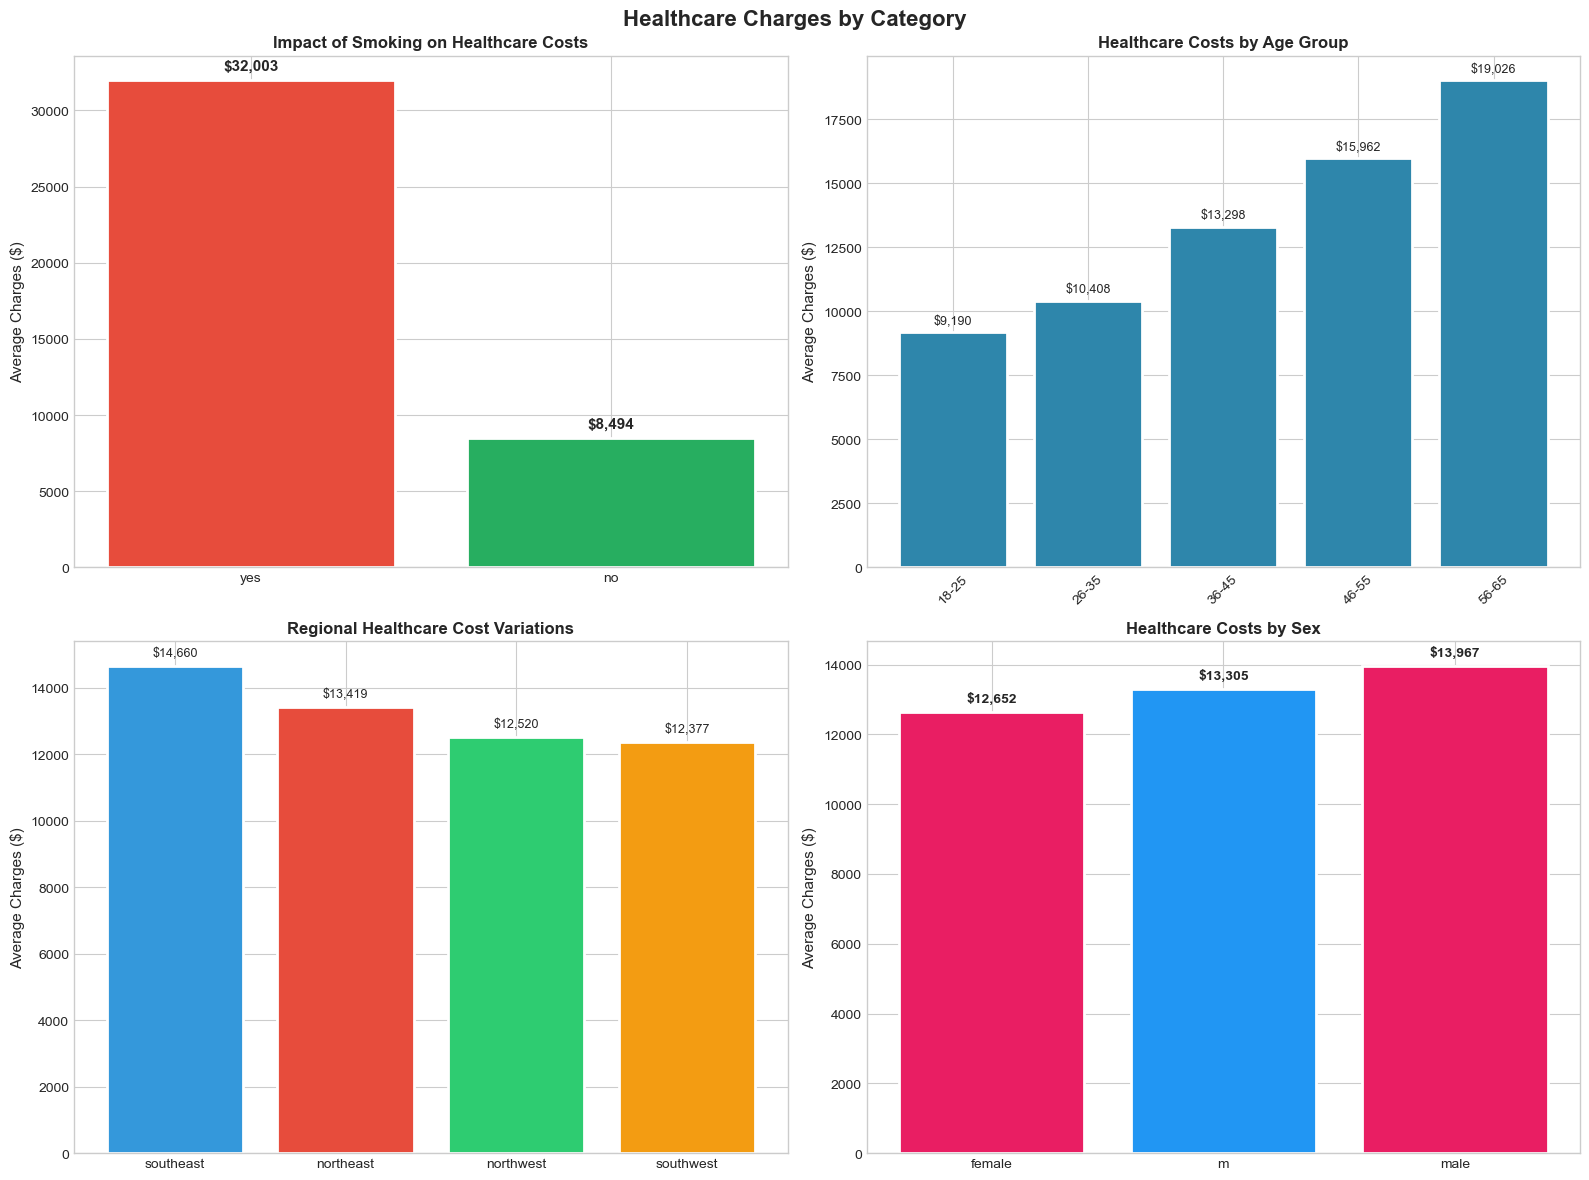

In [5]:
# Analyze charges by different categories
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Healthcare Charges by Category', fontsize=16, fontweight='bold')

# 1. By Smoker Status
smoker_charges = df.groupby('smoker')['charges'].mean().sort_values(ascending=False)
bars = axes[0, 0].bar(smoker_charges.index, smoker_charges.values, color=['#e74c3c', '#27ae60'], edgecolor='white', linewidth=2)
axes[0, 0].set_ylabel('Average Charges ($)', fontsize=11)
axes[0, 0].set_title('Impact of Smoking on Healthcare Costs', fontsize=12, fontweight='bold')
for bar, val in zip(bars, smoker_charges.values):
    axes[0, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 500,
                    f'${val:,.0f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# 2. By Age Group
df_temp = df.copy()
df_temp['age_group'] = pd.cut(df_temp['age'], bins=[0, 25, 35, 45, 55, 65, 100],
                               labels=['18-25', '26-35', '36-45', '46-55', '56-65', '65+'])
age_charges = df_temp.groupby('age_group')['charges'].mean()
bars = axes[0, 1].bar(age_charges.index, age_charges.values, color='#2E86AB', edgecolor='white', linewidth=2)
axes[0, 1].set_ylabel('Average Charges ($)', fontsize=11)
axes[0, 1].set_title('Healthcare Costs by Age Group', fontsize=12, fontweight='bold')
axes[0, 1].tick_params(axis='x', rotation=45)
for bar, val in zip(bars, age_charges.values):
    axes[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 200,
                    f'${val:,.0f}', ha='center', va='bottom', fontsize=9)

# 3. By Region
region_charges = df.groupby('region')['charges'].mean().sort_values(ascending=False)
region_colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']
bars = axes[1, 0].bar(region_charges.index, region_charges.values, color=region_colors[:len(region_charges)], edgecolor='white', linewidth=2)
axes[1, 0].set_ylabel('Average Charges ($)', fontsize=11)
axes[1, 0].set_title('Regional Healthcare Cost Variations', fontsize=12, fontweight='bold')
for bar, val in zip(bars, region_charges.values):
    axes[1, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 200,
                    f'${val:,.0f}', ha='center', va='bottom', fontsize=9)

# 4. By Sex
sex_charges = df.groupby('sex')['charges'].mean()
bars = axes[1, 1].bar(sex_charges.index, sex_charges.values, color=['#e91e63', '#2196f3'], edgecolor='white', linewidth=2)
axes[1, 1].set_ylabel('Average Charges ($)', fontsize=11)
axes[1, 1].set_title('Healthcare Costs by Sex', fontsize=12, fontweight='bold')
for bar, val in zip(bars, sex_charges.values):
    axes[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 200,
                    f'${val:,.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

### 3.3 Correlation Analysis

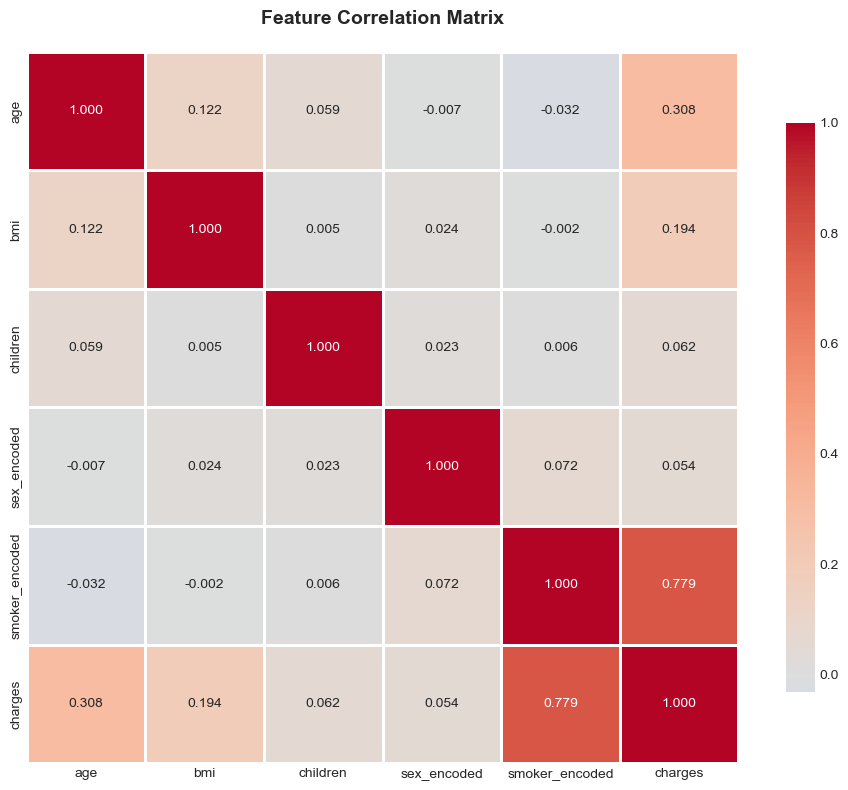

CORRELATION WITH CHARGES
smoker_encoded      : +0.7794
age                 : +0.3075
bmi                 : +0.1940
children            : +0.0615
sex_encoded         : +0.0542


In [6]:
# Create correlation heatmap
df_corr = df.copy()
df_corr['sex_encoded'] = df_corr['sex'].map({'male': 1, 'female': 0})
df_corr['smoker_encoded'] = df_corr['smoker'].map({'yes': 1, 'no': 0})

correlation_cols = ['age', 'bmi', 'children', 'sex_encoded', 'smoker_encoded', 'charges']
correlation_matrix = df_corr[correlation_cols].corr()

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('Feature Correlation Matrix', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Display correlation with charges
print("="*60)
print("CORRELATION WITH CHARGES")
print("="*60)
charges_corr = correlation_matrix['charges'].sort_values(ascending=False)
for feature, corr in charges_corr.items():
    if feature != 'charges':
        print(f"{feature:20s}: {corr:+.4f}")

### 3.4 Advanced Scatter Plots

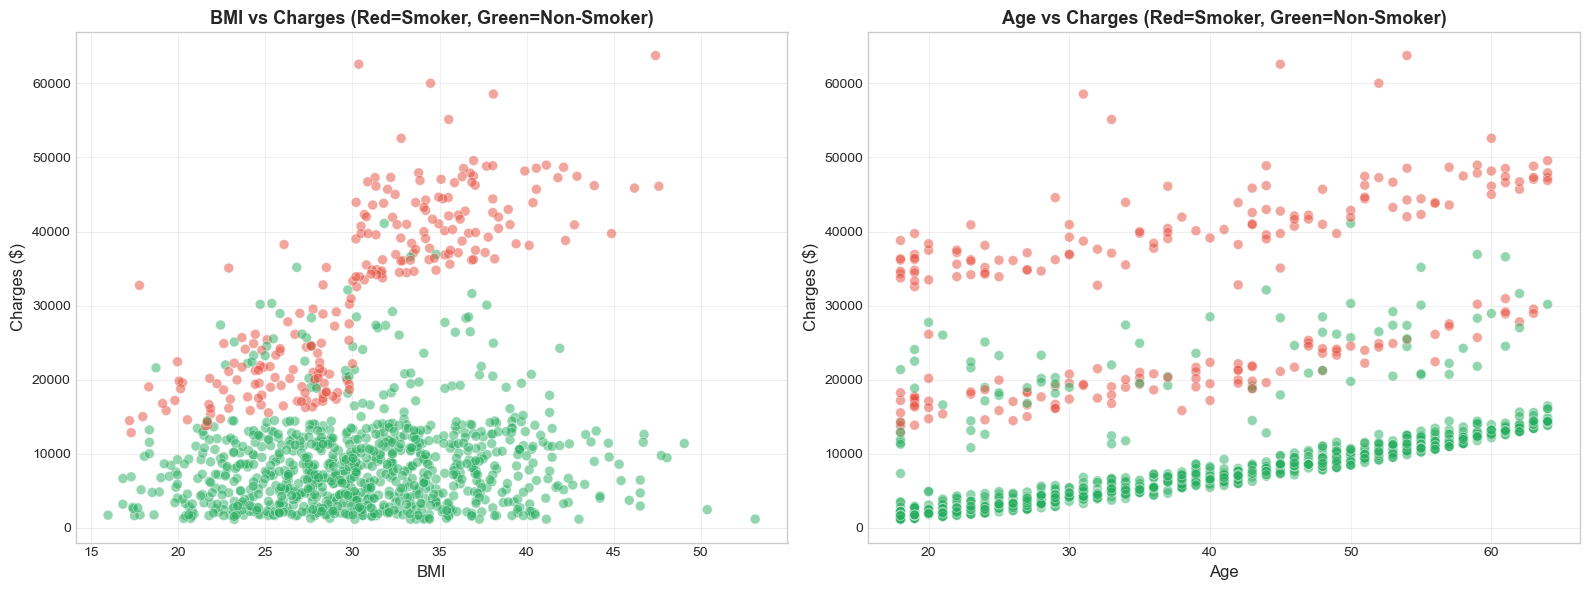

In [7]:
# BMI vs Charges and Age vs Charges colored by smoker status
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

colors_scatter = df['smoker'].map({'yes': '#e74c3c', 'no': '#27ae60'})

# BMI vs Charges
axes[0].scatter(df['bmi'], df['charges'], c=colors_scatter, alpha=0.5, s=50, edgecolors='white', linewidth=0.5)
axes[0].set_xlabel('BMI', fontsize=12)
axes[0].set_ylabel('Charges ($)', fontsize=12)
axes[0].set_title('BMI vs Charges (Red=Smoker, Green=Non-Smoker)', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Age vs Charges
axes[1].scatter(df['age'], df['charges'], c=colors_scatter, alpha=0.5, s=50, edgecolors='white', linewidth=0.5)
axes[1].set_xlabel('Age', fontsize=12)
axes[1].set_ylabel('Charges ($)', fontsize=12)
axes[1].set_title('Age vs Charges (Red=Smoker, Green=Non-Smoker)', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Model Performance Analysis

Examine the model's performance in detail.

In [8]:
# Display model metrics
print("="*60)
print("MODEL PERFORMANCE METRICS")
print("="*60)
print(f"\nR² Score:        {metrics['r2']:.4f}")
print(f"RMSE:            ${metrics['rmse']:,.2f}")
print(f"MAE:             ${metrics['mae']:,.2f}")
print(f"CV Mean:         {metrics['cv_mean']:.4f}")
print(f"CV Std:          {metrics['cv_std']:.4f}")

# Interpretation
print("\n" + "="*60)
print("MODEL INTERPRETATION")
print("="*60)
print(f"\nThe model explains {metrics['r2']*100:.2f}% of the variance in healthcare costs.")
print(f"On average, predictions are off by ${metrics['mae']:,.2f}.")

if metrics['r2'] > 0.85:
    print("\n✅ Model Performance: EXCELLENT")
    print("   The model is highly reliable for cost predictions.")
elif metrics['r2'] > 0.75:
    print("\n✅ Model Performance: GOOD")
    print("   The model performs well and can be used for predictions.")
else:
    print("\n⚠️  Model Performance: MODERATE")
    print("   Consider additional features or model tuning.")

MODEL PERFORMANCE METRICS

R² Score:        0.8299
RMSE:            $4,679.66
MAE:             $2,874.53
CV Mean:         0.8300
CV Std:          0.0270

MODEL INTERPRETATION

The model explains 82.99% of the variance in healthcare costs.
On average, predictions are off by $2,874.53.

✅ Model Performance: GOOD
   The model performs well and can be used for predictions.


## 5. Validation Predictions Analysis

In [9]:
# Examine validation predictions
print("="*60)
print("VALIDATION PREDICTIONS SUMMARY")
print("="*60)
print(f"\nTotal Predictions:  {len(predictions)}")
print(f"Minimum:            ${predictions.min():,.2f}")
print(f"Maximum:            ${predictions.max():,.2f}")
print(f"Mean:               ${predictions.mean():,.2f}")
print(f"Median:             ${np.median(predictions):,.2f}")
print(f"Standard Deviation: ${predictions.std():,.2f}")

# Load the predictions CSV to display
predictions_df = pd.read_csv('validation_predictions.csv')
print("\n" + "="*60)
print("SAMPLE PREDICTIONS")
print("="*60)
display(predictions_df.head(15))

VALIDATION PREDICTIONS SUMMARY

Total Predictions:  50
Minimum:            $1,708.17
Maximum:            $115,225.15
Mean:               $24,107.24
Median:             $12,159.92
Standard Deviation: $30,060.62

SAMPLE PREDICTIONS


,age,sex,bmi,children,smoker,region,predicted_charges
0,18.0,female,24.09,1.0,no,southeast,2916.91
1,39.0,male,26.41,0.0,yes,northeast,8698.21
2,27.0,male,29.15,0.0,yes,southeast,8947.06
3,71.0,male,65.50,13.0,yes,southeast,79725.23
4,28.0,male,38.06,0.0,no,southeast,4952.60
5,70.0,female,72.96,11.0,yes,southeast,89985.44
6,29.0,female,32.11,2.0,no,northwest,6697.69
7,42.0,female,41.33,1.0,no,northeast,10609.42
8,48.0,female,36.58,0.0,no,northwest,11156.30
9,63.0,male,33.66,3.0,no,southeast,15634.97


### 5.1 Validation Predictions Visualization

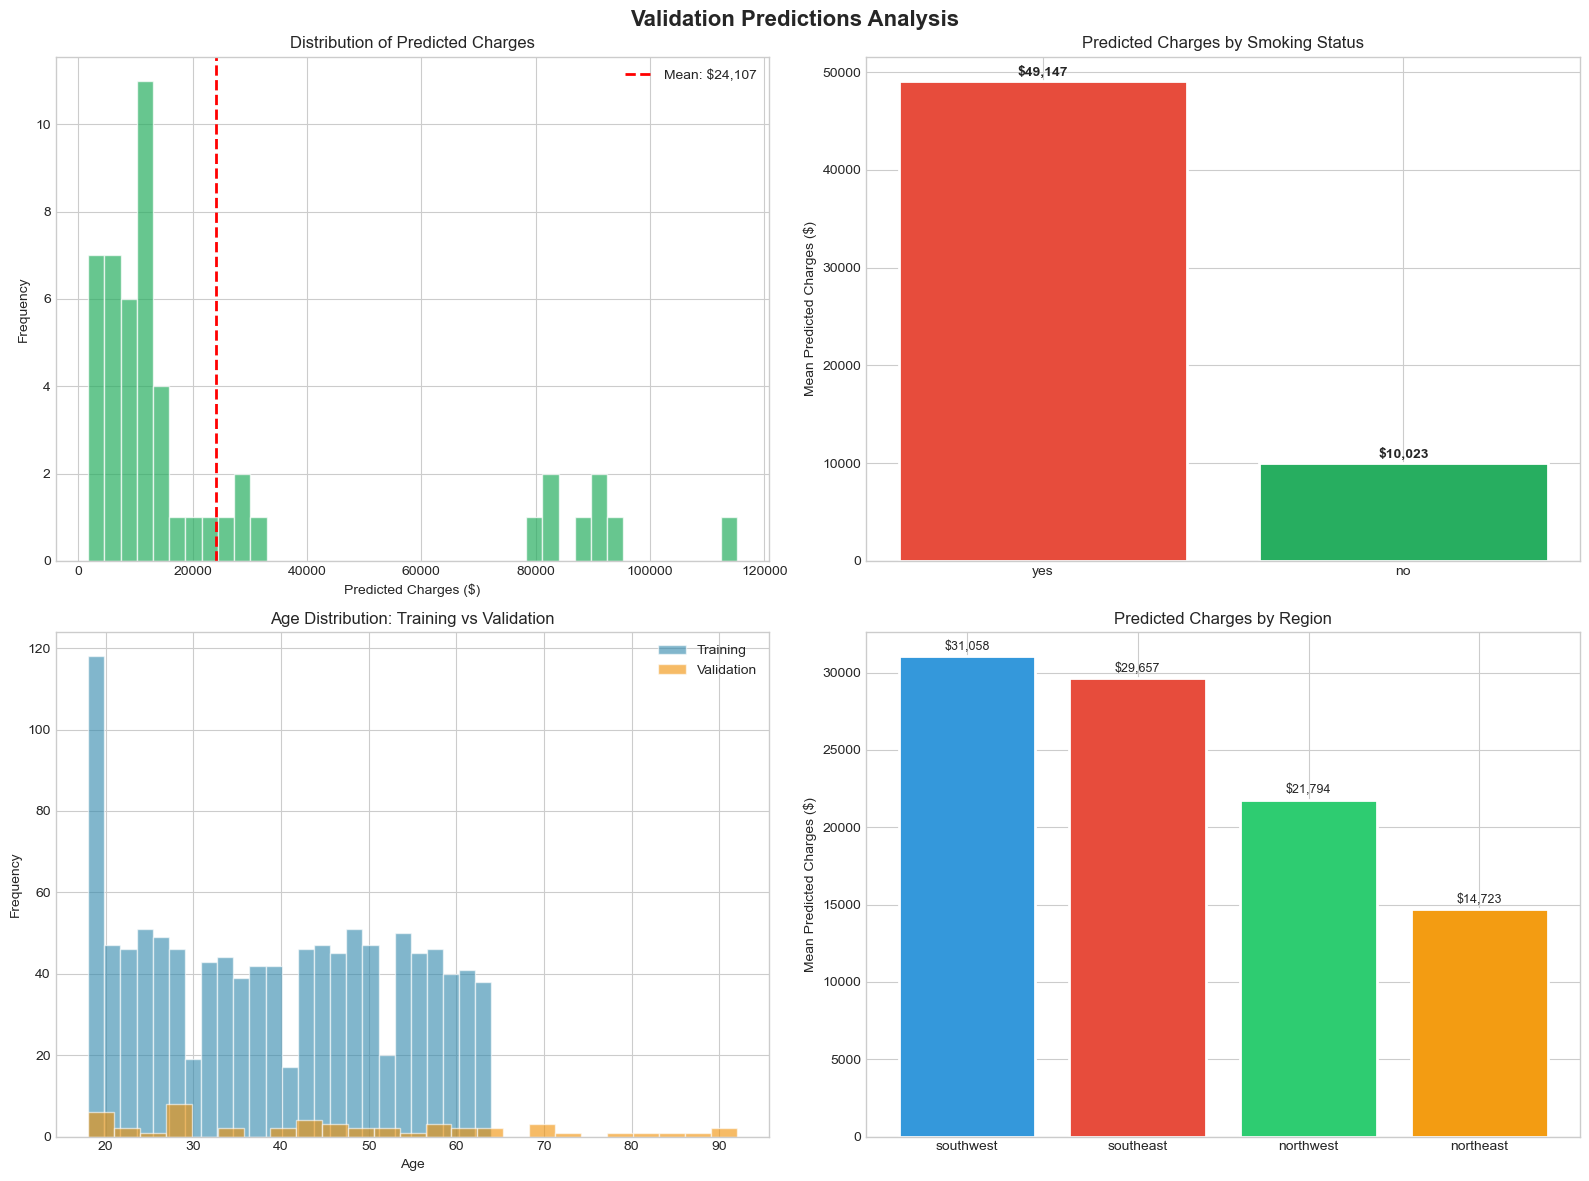

In [10]:
# Visualize validation predictions
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Validation Predictions Analysis', fontsize=16, fontweight='bold')

# 1. Predictions distribution
axes[0, 0].hist(predictions, bins=40, color='#27ae60', edgecolor='white', alpha=0.7)
axes[0, 0].axvline(predictions.mean(), color='red', linestyle='--', linewidth=2, 
                   label=f'Mean: ${predictions.mean():,.0f}')
axes[0, 0].set_xlabel('Predicted Charges ($)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Predicted Charges')
axes[0, 0].legend()

# 2. By smoker status
val_output = val_df.copy()
val_output['predicted_charges'] = predictions
smoker_pred = val_output.groupby('smoker')['predicted_charges'].mean().sort_values(ascending=False)
bars = axes[0, 1].bar(smoker_pred.index, smoker_pred.values, color=['#e74c3c', '#27ae60'], edgecolor='white', linewidth=2)
axes[0, 1].set_ylabel('Mean Predicted Charges ($)')
axes[0, 1].set_title('Predicted Charges by Smoking Status')
for bar, val in zip(bars, smoker_pred.values):
    axes[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 200,
                    f'${val:,.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# 3. Age distribution comparison
axes[1, 0].hist(df['age'], bins=25, alpha=0.6, label='Training', color='#2E86AB', edgecolor='white')
axes[1, 0].hist(val_df['age'], bins=25, alpha=0.6, label='Validation', color='#F18F01', edgecolor='white')
axes[1, 0].set_xlabel('Age')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Age Distribution: Training vs Validation')
axes[1, 0].legend()

# 4. Predicted charges by region
region_pred = val_output.groupby('region')['predicted_charges'].mean().sort_values(ascending=False)
bars = axes[1, 1].bar(region_pred.index, region_pred.values, color=['#3498db', '#e74c3c', '#2ecc71', '#f39c12'][:len(region_pred)], edgecolor='white', linewidth=2)
axes[1, 1].set_ylabel('Mean Predicted Charges ($)')
axes[1, 1].set_title('Predicted Charges by Region')
for bar, val in zip(bars, region_pred.values):
    axes[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 200,
                    f'${val:,.0f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

## 6. Custom Predictions

Make predictions for custom scenarios.

In [11]:
# You can retrain a model if needed
# This loads fresh data and trains a new model

print("Training a fresh model for custom predictions...")
model, model_metrics, X_test, y_test, y_pred, feature_list = train_model(df)

print("\n✓ Model trained successfully!")
print(f"   R² Score: {model_metrics['r2']:.4f}")
print(f"   RMSE: ${model_metrics['rmse']:,.2f}")

Training a fresh model for custom predictions...

✓ Model trained successfully!
   R² Score: 0.8299
   RMSE: $4,679.66


COST COMPARISON ACROSS SCENARIOS
                  scenario_name  age  bmi smoker predicted_cost
     Young, Healthy, Non-Smoker   25 22.0     no      $3,463.03
         Young, Healthy, Smoker   25 22.0    yes     $-1,932.33
Middle-aged, Family, Non-Smoker   45 28.0     no     $11,123.13
    Middle-aged, Family, Smoker   45 28.0    yes     $13,572.20
 Senior, Overweight, Non-Smoker   60 32.0     no     $13,330.65
     Senior, Overweight, Smoker   60 32.0    yes     $20,971.63


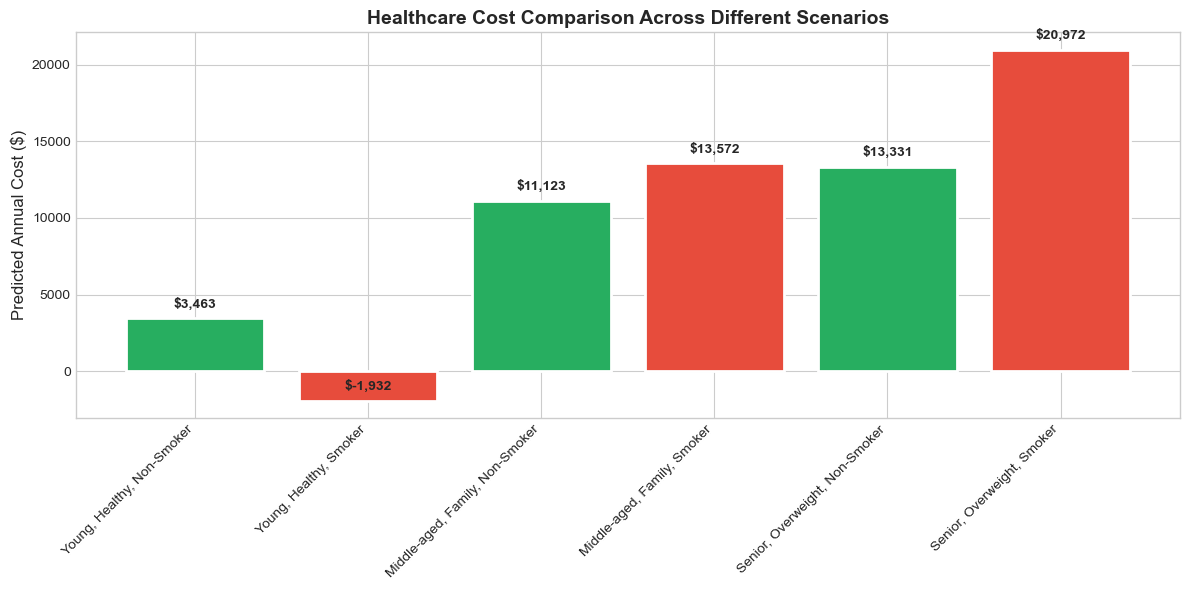

In [12]:
# Create custom prediction scenarios
# Example: Compare costs for different scenarios

scenarios = pd.DataFrame([
    {'age': 25, 'sex': 'male', 'bmi': 22.0, 'children': 0, 'smoker': 'no', 'region': 'southwest'},
    {'age': 25, 'sex': 'male', 'bmi': 22.0, 'children': 0, 'smoker': 'yes', 'region': 'southwest'},
    {'age': 45, 'sex': 'female', 'bmi': 28.0, 'children': 2, 'smoker': 'no', 'region': 'northeast'},
    {'age': 45, 'sex': 'female', 'bmi': 28.0, 'children': 2, 'smoker': 'yes', 'region': 'northeast'},
    {'age': 60, 'sex': 'male', 'bmi': 32.0, 'children': 0, 'smoker': 'no', 'region': 'southeast'},
    {'age': 60, 'sex': 'male', 'bmi': 32.0, 'children': 0, 'smoker': 'yes', 'region': 'southeast'},
])

scenarios['scenario_name'] = [
    'Young, Healthy, Non-Smoker',
    'Young, Healthy, Smoker',
    'Middle-aged, Family, Non-Smoker',
    'Middle-aged, Family, Smoker',
    'Senior, Overweight, Non-Smoker',
    'Senior, Overweight, Smoker'
]

# Make predictions for scenarios
scenario_processed, scenario_predictions = predict_validation(model, scenarios, feature_list)

scenarios['predicted_cost'] = scenario_predictions

print("="*80)
print("COST COMPARISON ACROSS SCENARIOS")
print("="*80)
# Format and display without using .style (which requires jinja2)
display_df = scenarios[['scenario_name', 'age', 'bmi', 'smoker', 'predicted_cost']].copy()
display_df['predicted_cost'] = display_df['predicted_cost'].apply(lambda x: f'${x:,.2f}')
print(display_df.to_string(index=False))

# Visualize scenario comparisons
fig, ax = plt.subplots(figsize=(12, 6))
colors_scenario = ['#27ae60' if 'Non-Smoker' in name else '#e74c3c' for name in scenarios['scenario_name']]
bars = ax.bar(range(len(scenarios)), scenarios['predicted_cost'], color=colors_scenario, edgecolor='white', linewidth=2)
ax.set_xticks(range(len(scenarios)))
ax.set_xticklabels(scenarios['scenario_name'], rotation=45, ha='right')
ax.set_ylabel('Predicted Annual Cost ($)', fontsize=12)
ax.set_title('Healthcare Cost Comparison Across Different Scenarios', fontsize=14, fontweight='bold')

for bar, val in zip(bars, scenarios['predicted_cost']):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 500,
            f'${val:,.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

## 7. Key Insights Summary

In [13]:
# Generate comprehensive insights
print("="*70)
print("KEY INSIGHTS FROM HEALTHCARE COST ANALYSIS")
print("="*70)

# Smoking Impact
smoker_yes_avg = df[df['smoker']=='yes']['charges'].mean()
smoker_no_avg = df[df['smoker']=='no']['charges'].mean()
smoker_multiplier = smoker_yes_avg / smoker_no_avg

print("\n🚬 SMOKING IMPACT:")
print("-" * 70)
print(f"   • Smokers pay {smoker_multiplier:.2f}x more than non-smokers")
print(f"   • Average smoker cost: ${smoker_yes_avg:,.2f}")
print(f"   • Average non-smoker cost: ${smoker_no_avg:,.2f}")
print(f"   • Cost difference: ${smoker_yes_avg - smoker_no_avg:,.2f}")

# Age Impact
df_age = df.copy()
df_age['age_group'] = pd.cut(df_age['age'], bins=[0, 25, 35, 45, 55, 65, 100],
                              labels=['18-25', '26-35', '36-45', '46-55', '56-65', '65+'])
age_charges = df_age.groupby('age_group')['charges'].mean()

print("\n👤 AGE IMPACT:")
print("-" * 70)
print(f"   • Youngest (18-25): ${age_charges.iloc[0]:,.2f}")
print(f"   • Oldest (65+): ${age_charges.iloc[-1]:,.2f}")
print(f"   • Increase with age: ${age_charges.iloc[-1] - age_charges.iloc[0]:,.2f}")

# BMI Impact
print("\n⚖️  BMI IMPACT:")
print("-" * 70)
df_bmi = df.copy()
df_bmi['bmi_cat'] = pd.cut(df_bmi['bmi'], bins=[0, 25, 30, 100],
                           labels=['Normal/Underweight', 'Overweight', 'Obese'])
bmi_charges = df_bmi.groupby('bmi_cat')['charges'].mean()
for cat, charge in bmi_charges.items():
    print(f"   • {cat}: ${charge:,.2f}")

print("\n💡 TOP RECOMMENDATIONS:")
print("-" * 70)
print("   1. Prioritize smoking cessation programs (biggest cost driver)")
print("   2. Implement age-based preventive care strategies")
print("   3. Promote healthy BMI through wellness programs")
print("   4. Use predictive model for personalized pricing")
print("   5. Focus interventions on high-risk groups")

print("\n" + "="*70)

KEY INSIGHTS FROM HEALTHCARE COST ANALYSIS

🚬 SMOKING IMPACT:
----------------------------------------------------------------------
   • Smokers pay 3.77x more than non-smokers
   • Average smoker cost: $32,003.36
   • Average non-smoker cost: $8,494.29
   • Cost difference: $23,509.07

👤 AGE IMPACT:
----------------------------------------------------------------------
   • Youngest (18-25): $9,190.12
   • Oldest (65+): $19,026.31
   • Increase with age: $9,836.19

⚖️  BMI IMPACT:
----------------------------------------------------------------------
   • Normal/Underweight: $10,097.07
   • Overweight: $10,942.82
   • Obese: $15,713.37

💡 TOP RECOMMENDATIONS:
----------------------------------------------------------------------
   1. Prioritize smoking cessation programs (biggest cost driver)
   2. Implement age-based preventive care strategies
   3. Promote healthy BMI through wellness programs
   4. Use predictive model for personalized pricing
   5. Focus interventions on high-ri

## 8. Export & Next Steps

In [14]:
print("="*60)
print("ANALYSIS OUTPUTS")
print("="*60)
print("\n✓ Files Generated:")
print("   1. healthcare_dashboard.png - Comprehensive visual dashboard")
print("   2. validation_predictions.csv - All validation predictions")
print("\n✓ Available in Memory:")
print("   - df: Training dataset")
print("   - val_df: Validation dataset")
print("   - model: Trained prediction model")
print("   - predictions: Validation predictions array")
print("   - metrics: Model performance metrics")

print("\n" + "="*60)
print("NEXT STEPS")
print("="*60)
print("""
1. Review the comprehensive dashboard (healthcare_dashboard.png)
2. Examine validation predictions (validation_predictions.csv)
3. Use the model for custom predictions
4. Implement business recommendations
5. Monitor model performance over time
6. Retrain with new data as needed
""")

print("="*60)
print("✓ Analysis Complete! 🎉")
print("="*60)

ANALYSIS OUTPUTS

✓ Files Generated:
   1. healthcare_dashboard.png - Comprehensive visual dashboard
   2. validation_predictions.csv - All validation predictions

✓ Available in Memory:
   - df: Training dataset
   - val_df: Validation dataset
   - model: Trained prediction model
   - predictions: Validation predictions array
   - metrics: Model performance metrics

NEXT STEPS

1. Review the comprehensive dashboard (healthcare_dashboard.png)
2. Examine validation predictions (validation_predictions.csv)
3. Use the model for custom predictions
4. Implement business recommendations
5. Monitor model performance over time
6. Retrain with new data as needed

✓ Analysis Complete! 🎉


---

## Additional Notes

### Reusable Functions from healthcare_analysis.py:

- `load_and_clean_data()` - Load and clean training data
- `load_validation_data()` - Load and clean validation data
- `prepare_features(df)` - Engineer features for a dataset
- `train_model(df)` - Train the prediction model
- `predict_validation(model, df, features)` - Make predictions
- `create_dashboard(...)` - Generate comprehensive dashboard
- `main()` - Run complete pipeline

*Healthcare Cost Prediction - Interactive Analysis Notebook*